# This notebook contains EDA,visualization and sentiment analysis on Covid-19 tweets

Downloaded tweets with the hashtag #covid19


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load all the required libraries

In [96]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
import re
import string

from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md


In [3]:
data=pd.read_csv("dataset/covid19_tweets.csv")

**Let's look at the dataset we have :**

user_name - contains the user name of that person.

user_location - contains the user's loaction from where he/she has tweeted.

user_description - It contains the user description on Tweeter

user_created - It contains the user id created time and date.

user_followers - It conatins the followers of users

user_friends - It contains the user's friends on Tweeter

user_favourites - It conatins user's favourites on Tweeter.

user_verified - User is verified or not ( True / False )

date - Date of Tweet

text - Text of Tweet he/she has tweeted.

hashtags - how many hashtags his/her tweet have.

source - It contains the source of that.

is_retweet - Any retweets it have or not ( True / False ).

In [4]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [5]:
#Dtypes of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [6]:
#Description of the dataset
data.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [7]:
#Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(data.shape[0],data.shape[1]))

There are 179108 rows and 13 columns in the dataset.


## Visualization

### 1. Word cloud

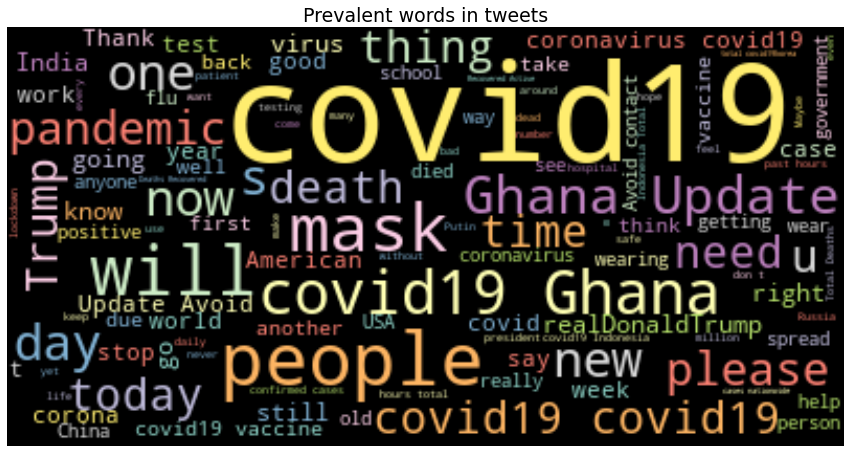

In [102]:
text = ",".join(review for review in data.text if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.save()
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Prevalent words in tweets',fontsize=19)
plt.show()

### 2. Number of Tweets by location(Top 10)

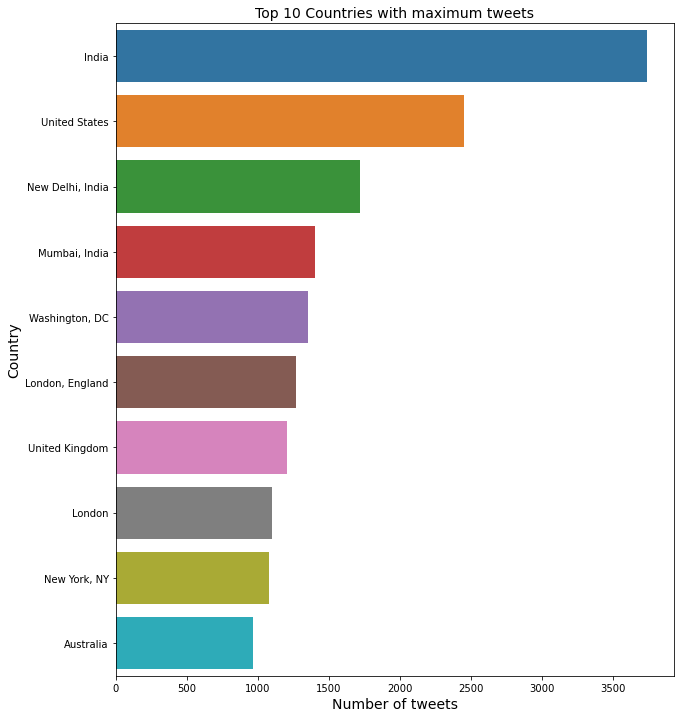

In [103]:
plt.figure(figsize=(10,12))
sns.barplot(data["user_location"].value_counts().values[0:10],
            data["user_location"].value_counts().index[0:10]);
plt.title("Top 10 Countries with maximum tweets",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Country",fontsize=14)
plt.show()

### 3. Heatmap representation of missing values

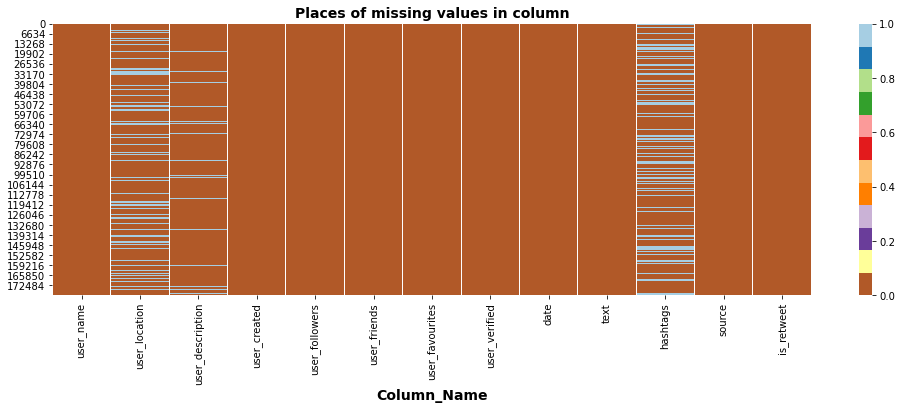

In [104]:
plt.figure(figsize=(17, 5))
sns.heatmap(data.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

### 4. Bar plot of unique values in each column

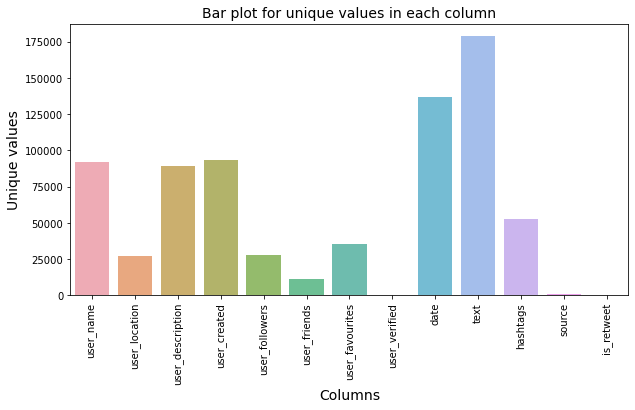

In [105]:
def unique_values_funct(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

udf = unique_values_funct(data)

f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot for unique values in each column', fontsize=14)
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.xticks(rotation=90)
plt.show()

### 5. Distribution of words in text column

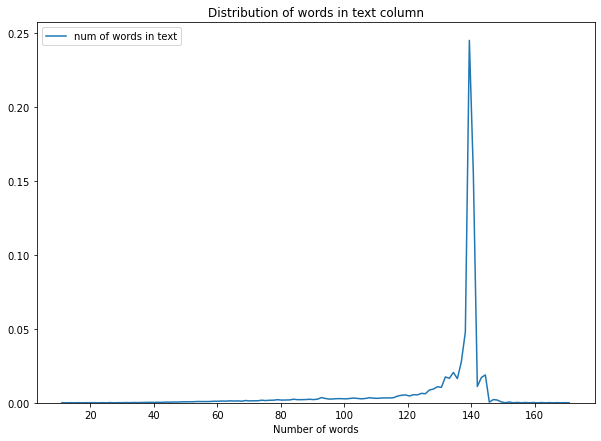

In [106]:
data["num of words in text"] = data["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(data["num of words in text"])
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

### 6. Users with maximum tweets(Top 20)

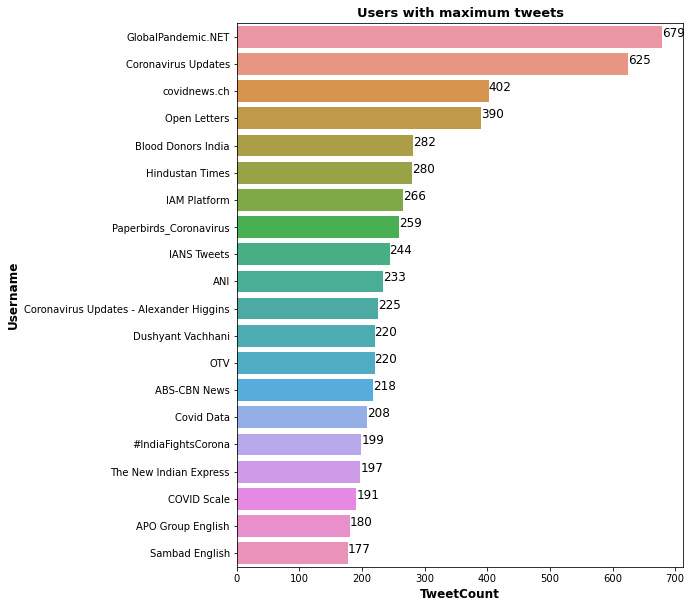

In [107]:
username_count = data['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'tweet_count','index':'user_name'})

plt.figure(figsize=(8, 10))
sns.barplot(y='user_name',x='tweet_count',data=username_count.head(20))
y=username_count['tweet_count'].head(20)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Users with maximum tweets',weight='bold', size=13)
plt.ylabel('Username', size=12, weight='bold')
plt.xlabel('TweetCount', size=12, weight='bold')
plt.show()

### 7. Plot verified users account

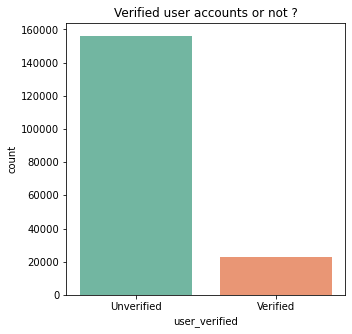

In [108]:
plt.figure(figsize=(5, 5))
sns.countplot(x ="user_verified",data=data, palette="Set2")
plt.title("Verified user accounts or not ?")
plt.xticks([False,True],['Unverified','Verified'])
plt.show()

### 8. Plot platform with maximum number of tweets

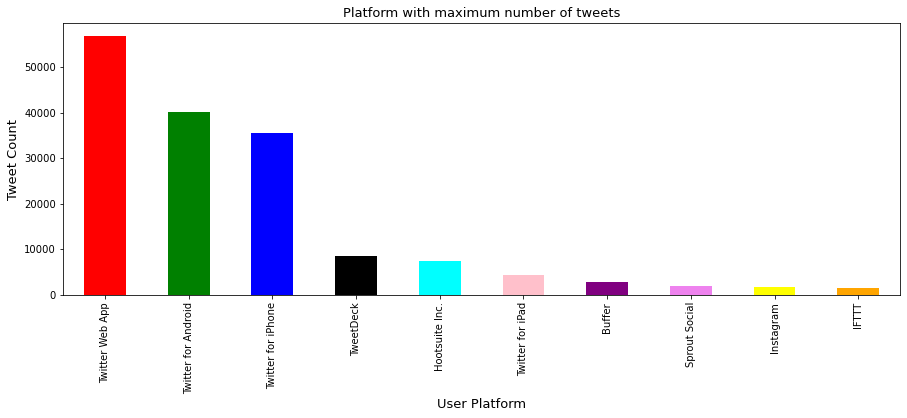

In [111]:
plt.figure(figsize=(15,5))
src = data['source'].value_counts().sort_values(ascending=False)
source = src.head(10)
source.plot.bar(color=['red', 'green', 'blue', 'black','cyan','pink','purple','violet','yellow','orange'])
plt.title('Platform with maximum number of tweets',size=13)
plt.xlabel('User Platform',size=13)
plt.ylabel('Tweet Count',size=13)
plt.show()

#### 8.1> 5 Most Tweet Sources used in India

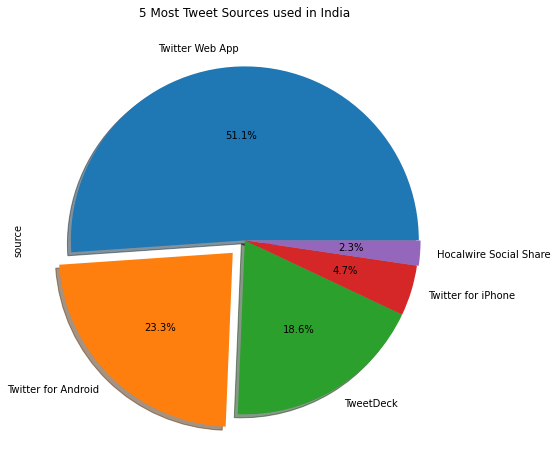

In [112]:
pla = data['source'][data['user_location'] == 'India'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = '5 Most Tweet Sources used in India', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

#### 8.2> 5 Most Tweet Sources used in USA

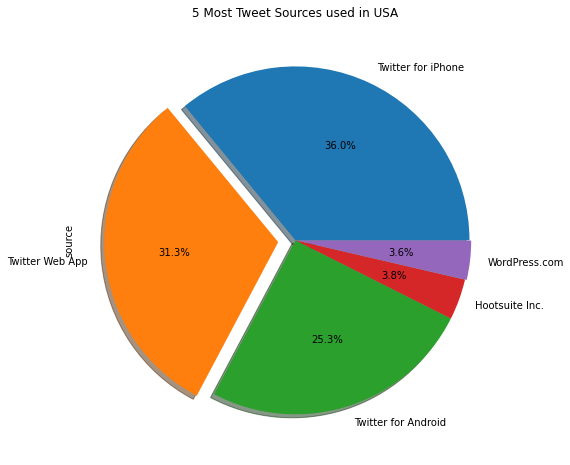

In [113]:
pla = data['source'][data['user_location'] == 'United States'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = '5 Most Tweet Sources used in USA', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

#### 8.3> 5 Most Tweet Sources used in Switzerland

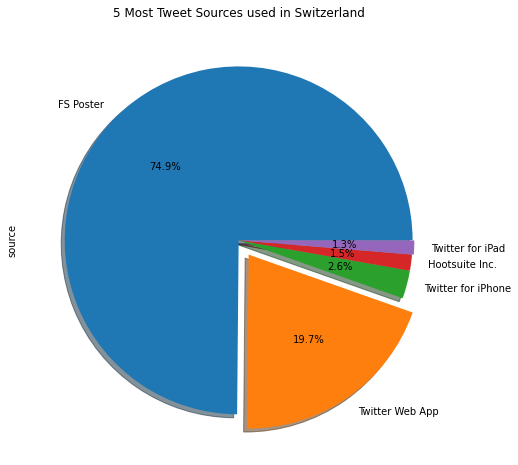

In [114]:
pla = data['source'][data['user_location'] == 'Switzerland'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = '5 Most Tweet Sources used in Switzerland', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

#### 8.4> 5 Most Tweet Sources used in Australia

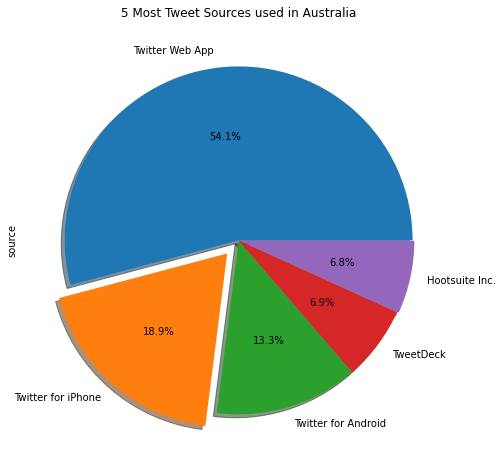

In [115]:
pla = data['source'][data['user_location'] == 'Australia'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = '5 Most Tweet Sources used in Australia', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

#### 8.5> 5 Most Tweet Sources used in United Kingdom

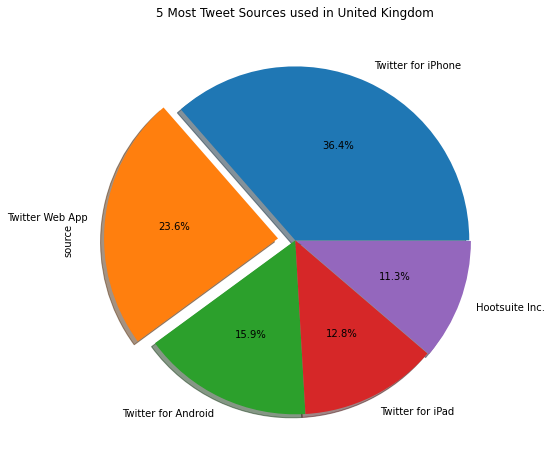

In [116]:
pla = data['source'][data['user_location'] == 'United Kingdom'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = '5 Most Tweet Sources used in United Kingdom', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

### 9. Plot top 5 hashtags

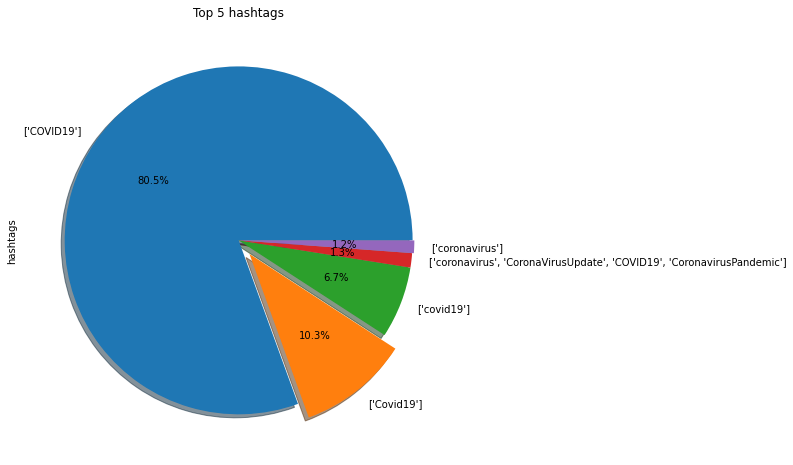

In [117]:
top_tags=data['hashtags'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,8))
explode = (0, 0.1, 0, 0,0.01) 

top_tags[0:5].plot(kind = 'pie',title = 'Top 5 hashtags',autopct='%1.1f%%',shadow=True,explode = explode)

### 10. Day with most number of tweets

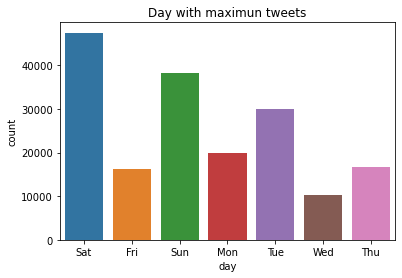

In [118]:
data["date"] = pd.to_datetime(data["date"])
data["Month"] = data["date"].apply(lambda x : x.month)
data["day"] = data["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data["day"] = data["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(data["day"])

## Sentiment Analysis on Covid19 Tweets

To peform sentiment analysis we need labeled dataset. The data can be downloaded from here: https://www.kaggle.com/surajkum1198/twitterdata

In [123]:
senti_df = pd.read_csv('/kaggle/input/twitterdata/finalSentimentdata2.csv')

In [120]:
senti_df

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


In [124]:
senti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3090 non-null   int64 
 1   sentiment   3090 non-null   object
 2   text        3090 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.5+ KB


In [125]:
senti_df['sentiment'].nunique

<bound method IndexOpsMixin.nunique of 0         sad
1         joy
2         joy
3         sad
4         sad
        ...  
3085      sad
3086    anger
3087      joy
3088      sad
3089      sad
Name: sentiment, Length: 3090, dtype: object>

In [126]:
senti_df.describe()

,Unnamed: 0
count,3090.000000
mean,2689.072816
std,1438.624297
min,3.000000
25%,1368.250000
50%,3030.500000
75%,3949.750000
max,4722.000000


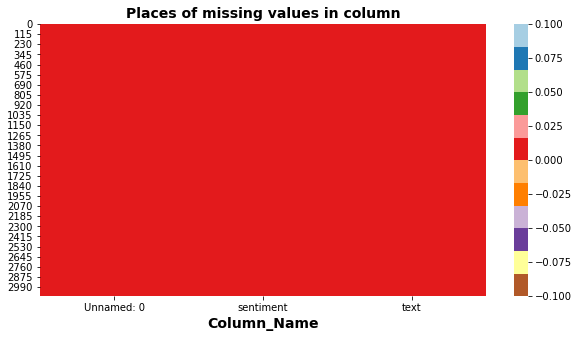

In [127]:
plt.figure(figsize=(10, 5))
sns.heatmap(senti_df.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

As we can see we dont have any missing/NaN value in our dataset.

## Data Preprocessing


Now let us preprocess text using some NLP tchniques like:

1. converting to lowercase
2. remove text in square brackets,
3. remove links,
4. remove punctuation
5. remove words containing numbers
6. Removing Punctuation
7. Removing stopwords
8. Stemming
9. Lemmatization

In [128]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    #Removing stopwords
    text=" ".join([word for word in str(text).split() if word not in stop_words])
    
    #Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])
    
    #Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

senti_df['text'] = senti_df['text'].apply(lambda x: clean_text(x))

Removing emojis

In [129]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

senti_df['text']=senti_df['text'].apply(lambda x: remove_emoji(x))

In [131]:
senti_df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agre poor india treat badli poor seek live sin...
1,1431,joy,could spent cuti vc sakshi n g h coast cross r...
2,654,joy,natur conserv remain prioriti post corona bang...
3,2530,sad,coronaviru disappear itali show intellectu say...
4,2296,sad,uk record lowest daili viru death toll sinc st...


### Correct spelling of incorrect words

If you are using high configuration machine then only perform this step of correcting incorrect words.

In [ ]:
"""
!pip install textblob

from textblob import TextBlob

def correct_bytextblob(sent):
    return str(TextBlob(sent).correct())

senti_df['text'] = senti_df['text'].apply(lambda x: correct_bytextblob(x))

senti_df.to_csv('clean_tweets.csv',index=False)
"""

## Splitting the dataset

In [138]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(senti_df,test_size = 0.2,random_state=0,stratify = senti_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (2472, 3)
valid shape :  (618, 3)


## Vectorizing

I've checked vectorizing using TF-IDF technique but its not performing well so going ahead with CountVectorizer

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.text.values)
X_valid = vectorizer.transform(valid.text.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (2472, 6491)
X_train.shape :  (618, 6491)
y_train.shape :  (2472,)
y_valid.shape :  (618,)


Since the classes are almost balanced, we dont need to perform any sampling technique.

## ML model building

### Naive Bayes

In [159]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.9275889967637541
Validation accuracy Score :  0.6974110032362459
              precision    recall  f1-score   support

       anger       0.56      0.70      0.62       125
        fear       0.64      0.58      0.61       177
         joy       0.74      0.85      0.79       126
         sad       0.85      0.71      0.77       190

    accuracy                           0.70       618
   macro avg       0.70      0.71      0.70       618
weighted avg       0.71      0.70      0.70       618



### Stochastic Gradient Descent

In [161]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9983818770226537
Validation accuracy Score :  0.7168284789644013
              precision    recall  f1-score   support

       anger       0.71      0.62      0.66       175
        fear       0.50      0.70      0.58       114
         joy       0.85      0.75      0.80       163
         sad       0.82      0.79      0.81       166

    accuracy                           0.72       618
   macro avg       0.72      0.72      0.71       618
weighted avg       0.74      0.72      0.72       618



### Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.6359223300970874
              precision    recall  f1-score   support

       anger       0.59      0.58      0.59       157
        fear       0.44      0.67      0.53       106
         joy       0.79      0.57      0.66       203
         sad       0.73      0.76      0.75       152

    accuracy                           0.64       618
   macro avg       0.64      0.64      0.63       618
weighted avg       0.67      0.64      0.64       618



#### Extreme Gradient Boosting

In [162]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.9142394822006472
Validation accuracy Score :  0.6828478964401294
              precision    recall  f1-score   support

       anger       0.60      0.61      0.61       150
        fear       0.54      0.65      0.59       134
         joy       0.78      0.68      0.73       165
         sad       0.82      0.77      0.79       169

    accuracy                           0.68       618
   macro avg       0.68      0.68      0.68       618
weighted avg       0.69      0.68      0.69       618



### Support Vector Machine 

In [163]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9377022653721683
Validation accuracy Score :  0.6585760517799353
              precision    recall  f1-score   support

       anger       0.60      0.64      0.62       143
        fear       0.53      0.69      0.60       122
         joy       0.77      0.60      0.67       186
         sad       0.75      0.72      0.74       167

    accuracy                           0.66       618
   macro avg       0.66      0.66      0.66       618
weighted avg       0.68      0.66      0.66       618



### Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.991504854368932
Validation accuracy Score :  0.7168284789644013
              precision    recall  f1-score   support

       anger       0.64      0.68      0.66       146
        fear       0.58      0.67      0.62       138
         joy       0.84      0.73      0.78       167
         sad       0.81      0.77      0.79       167

    accuracy                           0.72       618
   macro avg       0.72      0.71      0.71       618
weighted avg       0.73      0.72      0.72       618



All the model test accuracy in descending order

In [171]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.716828
4,Stochastic Gradient Decent,0.716828
3,Naive Bayes,0.697411
5,XGBoost,0.682848
0,Support Vector Machines,0.658576
2,Random Forest,0.635922
